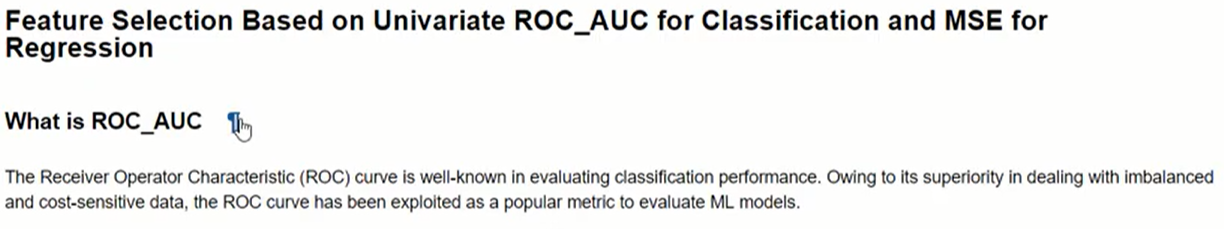

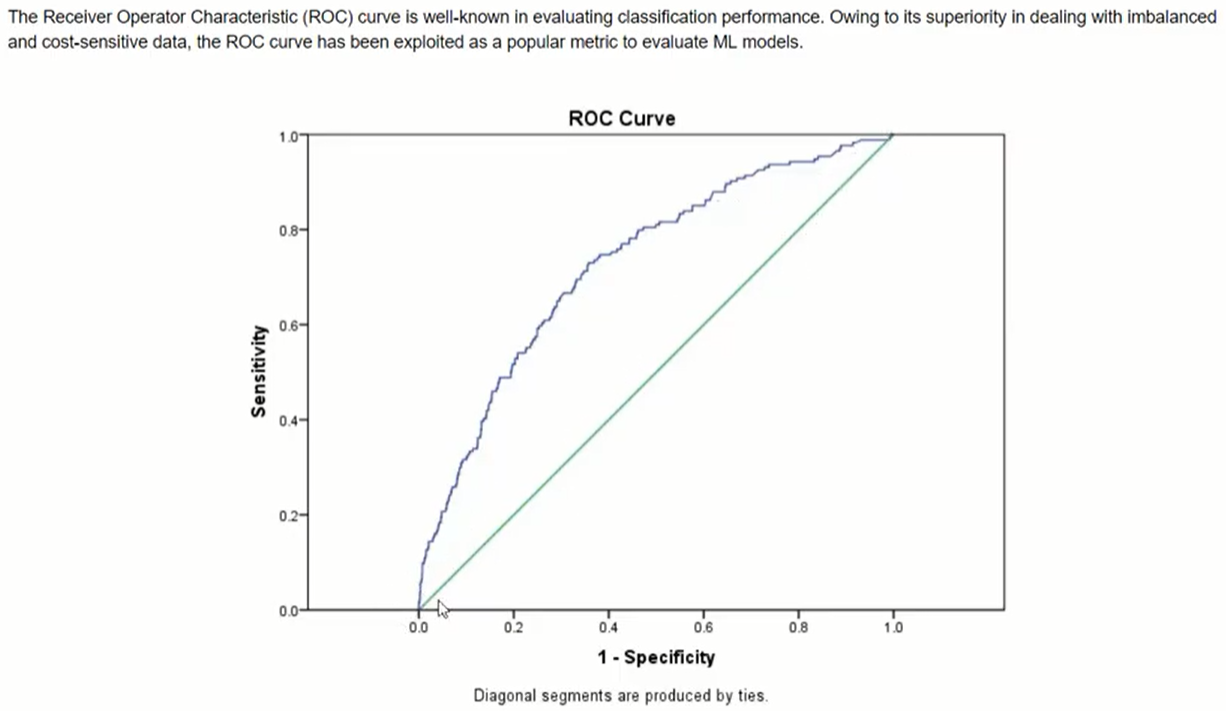

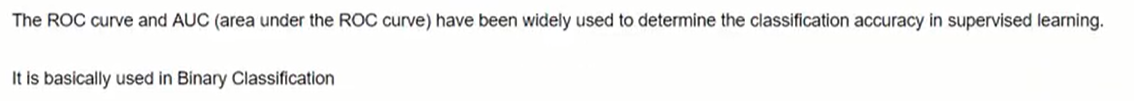

## 1. Classification Problem

In [1]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import VarianceThreshold

In [4]:
data = pd.read_csv('C:/Users/dell/Downloads/Data-Files-for-Feature-Selection-master/Data-Files-for-Feature-Selection-master/santander-train.csv', nrows=20000)

In [5]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 371 entries, ID to TARGET
dtypes: float64(98), int64(273)
memory usage: 56.6 MB


In [7]:
data.shape

(20000, 371)

In [8]:
X = data.drop(['TARGET'], axis = 1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

## Remove constant, quasi constant and duplicate features

### 1. Remove constant & quasi constant Features

In [52]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
## Apply transform on training dataset to avoid overfitting and to remove constant features
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [51]:
X_train_filter.shape, X_test_filter.shape, X_train.shape

((404, 13), (102, 13), (404, 13))

### 2. Remove duplicate features

In [12]:
# Transpose(T) the latest dataset -> convert to nparray
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [13]:
# COnvert nparray to pandas dataframe
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [14]:
# Check no of duplicate features
X_train_T.duplicated().sum()

25

In [15]:
duplicated_features = X_train_T.duplicated() # get duplicated features
features_to_keep = [not index for index in duplicated_features] # get not duplicated features

In [16]:
# Reverse transpose the features data
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [17]:
X_train_unique.shape, X_test_unique.shape, X_train.shape

((16000, 266), (4000, 266), (16000, 370))

### Calculate ROC_AUC Score

In [20]:
roc_auc = []
for feature in X_train_unique.columns:
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train_unique[feature].to_frame(), y_train)
    y_pred = clf.predict(X_test_unique[feature].to_frame())
    roc_auc.append(roc_auc_score(y_test, y_pred))

In [21]:
roc_auc

[0.5020561820568537,
 0.5,
 0.5,
 0.49986968986187125,
 0.501373452866903,
 0.49569976544175137,
 0.5028068643863192,
 0.49986968986187125,
 0.5,
 0.5,
 0.4997393797237425,
 0.5017643832812891,
 0.49569976544175137,
 0.49960906958561374,
 0.49895751889497003,
 0.49700286682303885,
 0.49960906958561374,
 0.5021553136956755,
 0.4968725566849101,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.49986968986187125,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5029371745244479,
 0.4959603857180089,
 0

In [22]:
roc_values = pd.Series(roc_auc)
roc_values.index = X_train_unique.columns
roc_values.sort_values(ascending=False, inplace=True)

In [23]:
roc_values # Few values are < 0.5 are not useful

290    0.507660
139    0.504832
136    0.502937
6      0.502807
189    0.502546
         ...   
18     0.496873
257    0.496742
137    0.495960
5      0.495700
12     0.495700
Length: 266, dtype: float64

<AxesSubplot:>

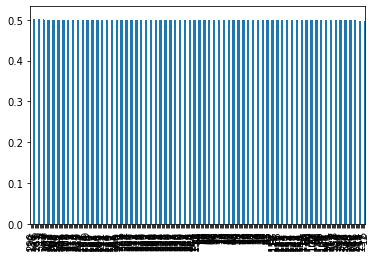

In [24]:
roc_values.plot.bar()

In [25]:
# Select features >0.5
sel = roc_values[roc_values>0.5]
sel

290    0.507660
139    0.504832
136    0.502937
6      0.502807
189    0.502546
261    0.502286
17     0.502155
0      0.502056
11     0.501764
4      0.501373
262    0.501243
dtype: float64

In [26]:
X_train_roc = X_train_unique[sel.index]
X_test_roc = X_test_unique[sel.index]

In [27]:
X_train_roc.shape, X_test_roc.shape, X_train.shape

((16000, 11), (4000, 11), (16000, 370))

## Build ML model and compare the performance of the selected features


In [28]:
# Function to calculate random forest ML accuracy
def run_random_forest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy on test set")
    print(accuracy_score(y_test, y_pred))

In [29]:
# Call random forest on cleaned selected features dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train_roc, X_test_roc, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")


Accuracy on test set
0.95275
Time: 2.408517360687256


In [30]:
# Call random forest on origional dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train, X_test, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")

Accuracy on test set
0.9585
Time: 3.574733257293701


## 2. Regression Problem

In [31]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
boston = load_boston()

In [33]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [37]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
y = boston.target

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
mse = []
for feature in X_train.columns:
    clf = LinearRegression()
    clf.fit(X_train[feature].to_frame(), y_train)
    y_pred = clf.predict(X_test[feature].to_frame())
    mse.append(mean_squared_error(y_test, y_pred))

In [41]:
mse

[76.38674157646072,
 84.66034377707905,
 77.02905244667242,
 79.36120219345942,
 76.95375968209433,
 46.907351627395315,
 80.3915476111525,
 82.61874125667718,
 82.46499985731933,
 78.30831374720843,
 81.79497121208003,
 77.75285601192718,
 46.33630536002592]

In [42]:
# convert mse to Series
mse = pd.Series(mse, index=X_train.columns)
mse.sort_values(ascending=False, inplace=True)
mse

ZN         84.660344
DIS        82.618741
RAD        82.465000
PTRATIO    81.794971
AGE        80.391548
CHAS       79.361202
TAX        78.308314
B          77.752856
INDUS      77.029052
NOX        76.953760
CRIM       76.386742
RM         46.907352
LSTAT      46.336305
dtype: float64

<AxesSubplot:>

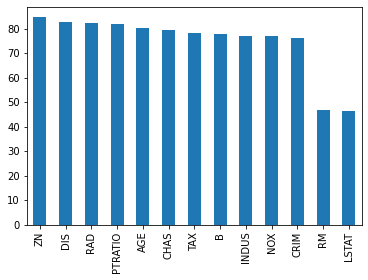

In [43]:
mse.plot.bar()

In [44]:
# Only last 2 features are important
## Calculate the performance on the basis of selected features and avoid overfitting
X_train_2 = X_train[['RM', 'LSTAT']]
X_test_2 = X_test[['RM', 'LSTAT']]
X_train_2.shape, X_test_2.shape

((404, 2), (102, 2))

In [47]:
# On selected features
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train_2, y_train)
y_pred = linearRegressionModel.predict(X_test_2)
print("r2_score:", r2_score(y_test, y_pred))
print("rese:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("SD of house:", np.std(y))

r2_score: 0.5409084827186417
rese: 6.114172522817782
SD of house: 9.188011545278203


In [49]:
# On whole dataset
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train, y_train)
y_pred = linearRegressionModel.predict(X_test)
print("r2_score:", r2_score(y_test, y_pred))
print("rese:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("SD of house:", np.std(y))

r2_score: 0.5892223849182507
rese: 5.783509315085135
SD of house: 9.188011545278203
